<a href="https://colab.research.google.com/github/PUNEETSUBHANJI/Health_insurance_cross_sell_prediction/blob/main/Health_insurance_cross_sell_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Health Insurance Cross Sell Prediction**

### **Predict Health insurance owners' who will be interested in buying Vehicle Insurance**

Our client is an Insurance company that has supplied Health Insurance to its customers now they require help in building a model to predict whether the consumers from the past year will also be interested in Vehicle Insurance provided by the company.

**Objective**

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

# Importing Required Libreries and Data

## Importing Required Libreries, mounting of drive and loading the dataset.

In [2]:
# importing libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
# Mounting of Drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Loading of data
data=pd.read_csv("/content/drive/MyDrive/Projects - Almabetter/Health/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

# Data summarization

In [5]:
# lets look at first 5 rows
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
# lets look at last 5 rows
data.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [7]:
# lets check shape, null values and datatypes,
print(data.info())
print()
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None

id                      0
Gender                  0
Age                     0
Driving_Licens

As per above observation we can say that : Dataset consists of 381109 rows & 12 columns. There are no Null or missing values present in the dataset.

In [8]:
# Descriptive Statistical Summary of Numeric Variables

data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# Data analysis and visualizations

##### Analysis of target variable 'response per count'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


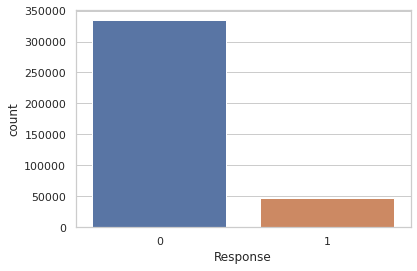

In [9]:
# Analyzing by plotting countplot
sns.set_theme(style='whitegrid')
sns.countplot(data['Response'],data=data)

* As per above observation, we can say that data is highly imbalanced

##### Analysis of Age vs Response

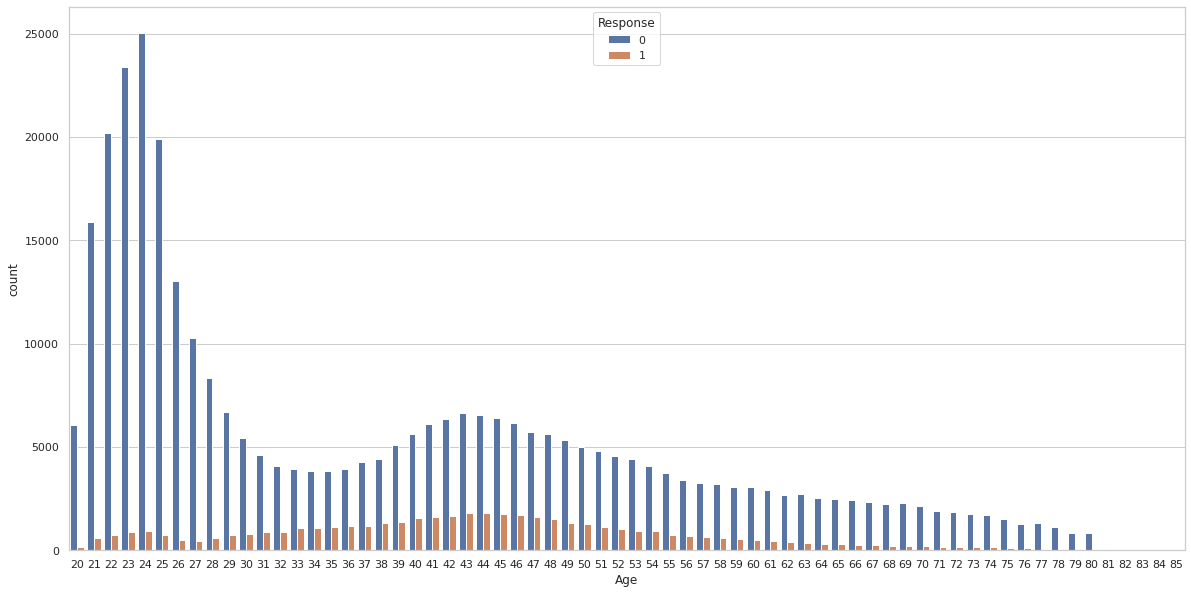

In [10]:
# Analysis of Age & Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


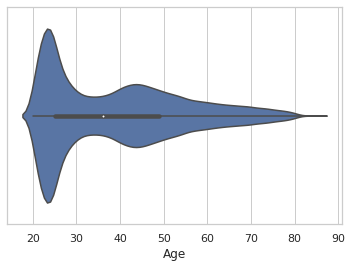

In [11]:
sns.violinplot(data['Age'])

* Youngsters under 30 are not intrigued by vehicle insurance. Reasons could be absence of involvement, less awareness about insurance and they may not have costly vehicles yet.
* People of age range between 30-60 years are more likely to be interested and willing to purchase.
* From the plot we can say that there are no outlier in the given .

##### Anlysis of Vehicle_Age w.r.t Response

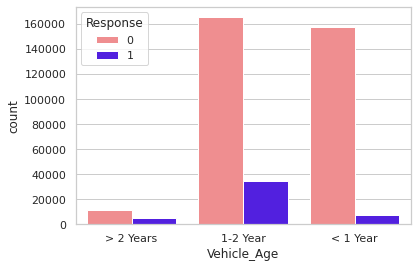

In [12]:
sns.countplot(x='Vehicle_Age',hue='Response',data=data,palette='gnuplot2_r')

* Consumers with 1-2-year-old vehicles are more interested as compared to others.

* Consumers with less than 1 year old Vehicles have very less chance of buying Insurance

##### Analyze : Previously_Insured w.r.t Response

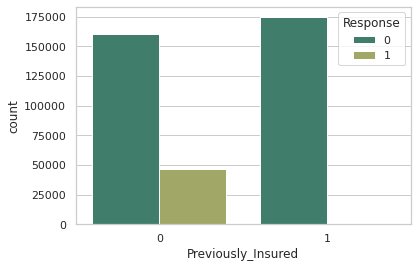

In [13]:
# Response analysis of previously insured customers from plot
sns.countplot(x='Previously_Insured',hue='Response',data=data,palette='gist_earth')

* Consumers who are not previously insured are probably interested

##### Analysis based on Gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


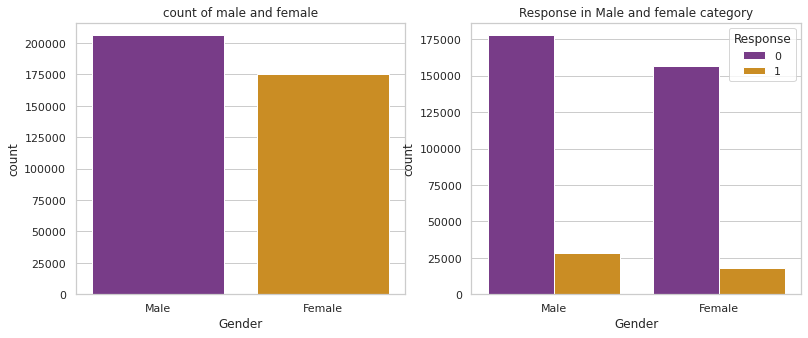

In [14]:
# Analyzing gender by plotting countplot
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(data['Gender'],palette='CMRmap')
plt.title("count of male and female")
plt.subplot(1,2,2)
sns.countplot(data['Gender'], hue = data['Response'],palette='CMRmap')
plt.title("Response in Male and female category")
plt.show()

* We observed the similairty in distribution of Gender variables.
* Male category is somewhat more noteworthy than that of female and chances of purchasing the insurance is likewise minimal high.

Analysis on Driving License

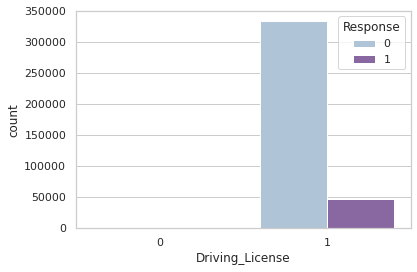

In [15]:
# Plotting countplot for Anlysis
sns.countplot(x='Driving_License',hue='Response', data=data, palette='BuPu')

* Customers most of them who showed interest in Vehicle Insurance, already  have driving license

##### Analysis based on Annual_Premium


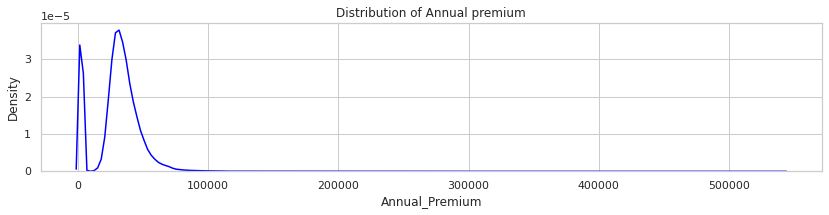

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


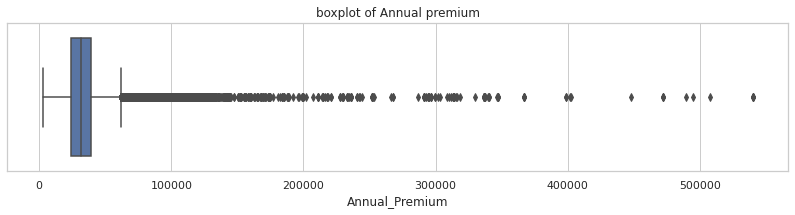

In [16]:
# Distribution of Annual premium
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.kdeplot(data['Annual_Premium'], color='blue')
plt.title("Distribution of Annual premium")
plt.show()

# Boxplot of Annual premium
plt.figure(figsize=(14,6))
plt.subplot(2,1,2)
sns.boxplot(data['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()


* Its observed from the distribution plot, that the annual premimum feature is right skewed.
* we can observe lot of outliers in the variables from above boxplot.

##### Defining Correlation 

Text(0.5, 1, 'Correlation of Variables')

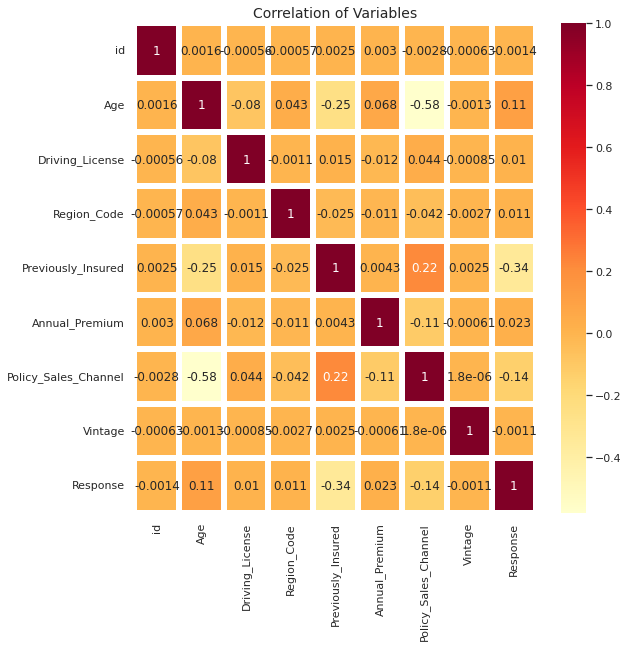

In [17]:
# Plotting heatmap to find correlation
corr = data.corr()
f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr, ax=ax, annot=True,linewidths=5,cmap='YlOrRd')
plt.title("Correlation of Variables", y=1, size=14)

*   Vintage features's is not much affecting Target variable. So we can drop such a least correlated features's.

# Data preparatoin, handling and feature creation.

#### Encoding of label 

In [18]:
# categorical value's are cahnged to numerical values
labelEncoder= LabelEncoder()
data['Gender'] = labelEncoder.fit_transform(data['Gender'])
data['Vehicle_Age'] = labelEncoder.fit_transform(data['Vehicle_Age'])
data['Vehicle_Damage'] = labelEncoder.fit_transform(data['Vehicle_Damage'])

In [19]:
# We can see the types of datatype 
data.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

#### Let's find the duplicate rows

In [20]:
# Identifying Duplicate rows
duplicate=data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []


No duplicate rows are identified.

#### Sepration of dependent and independent variables and feature creation

In [21]:
# Sepration of dependent and independent variables.

x=data.drop(['Response'],axis=1)                                # independent variable

y=data['Response']                                              # dependent variable

#### Feature Selection

In [22]:
# Implements a meta estimator that fits a number of randomized decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) # using inbuilt classs feature_importances of tree based classs



[0.19276022 0.00579545 0.13915915 0.00047788 0.0967385  0.05032026
 0.01505674 0.08206338 0.16332511 0.06793161 0.18637169]


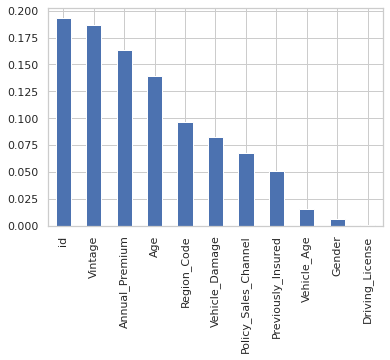

In [23]:
# visualization by plotting the graph of feature importances for better understanding

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='bar')
plt.show()

In [24]:
# Lets remove less important features from the data set such as Driving licence and gender.

x=x.drop(['Driving_License','Gender'],axis=1)

#### We will Handle the Imbalanced data and resample

With the use of resampling  we will resolve class imbalance.
At the point when observations in one class is higher than the observations in different classes then there exists a class imbalance. We can see that there is a colossal distinction between the informational index.


Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


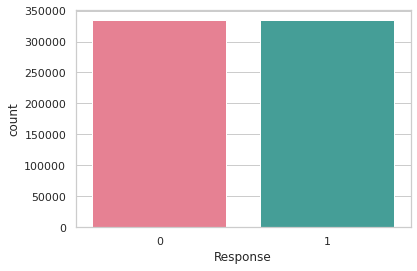

In [25]:
randomsample = RandomOverSampler()
x_new, y_new=randomsample.fit_resample(x,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')

#### Lets split the Data into train and test sets of data.

In [26]:
# splitting the dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,test_size=.30,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

# feature scaling :: Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

(468158, 9) (200640, 9) (468158,) (200640,)


#  Model Selection
* The Problem can be identified as Binary Classification such as whether consumer purchases vehicle insurance or not.

* Data contains more than 300000 information or variables.

* Its smarter to stay away from SVM Classifier because takes more time to train as the dataset increases.

### Fitting into Logistic Regression





In [27]:
# Model of logistic regression
model=LogisticRegression()
model=model.fit(xtrain,ytrain)
pred=model.predict(xtest)
lr_probability = model.predict_proba(xtest)[:,1]


accu_logReg=accuracy_score(ytest,pred)
recall_logReg=recall_score(ytest,pred)
prec_logReg=precision_score(ytest,pred)
f1_logReg=f1_score(ytest,pred)
Auc_logReg=roc_auc_score(pred,ytest)

# accuracy and Roc_Auc values of model
print("Accuracy : ", accuracy_score(ytest,pred))
print("ROC_AUC Score:",Auc_logReg)

Accuracy :  0.7836323763955343
ROC_AUC Score: 0.8336858284988717


In [28]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     61472
           1       0.98      0.70      0.82    139168

    accuracy                           0.78    200640
   macro avg       0.78      0.83      0.78    200640
weighted avg       0.86      0.78      0.79    200640



### ROC Curve (receiver operating characteristic curve)


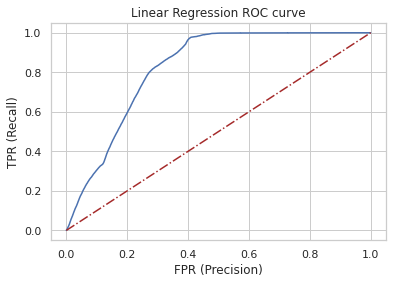

In [29]:
# Importing roc curve
# The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

from sklearn.metrics import roc_curve    
fpr, tpr, _ = roc_curve(ytest, lr_probability)     

# Evaluation metrics
plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)') # FPR, on the other hand, defines how many incorrect positive results occur among all negative samples available during the test.
plt.ylabel('TPR (Recall)')    # TPR defines how many correct positive results occur among all positive samples available during the test.

# Performance metrics
plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashdot',color='brown')
plt.show()

[[59194 41134]
 [ 2278 98034]]


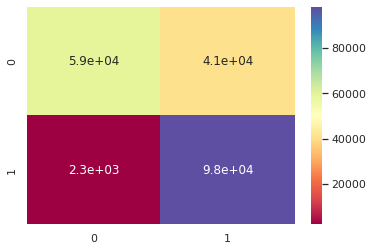

In [30]:
# Confusion matrix 
cm=confusion_matrix(ytest,pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='Spectral')

## Lets Run RandomForest Classifier

In [31]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier                                
randomforest = RandomForestClassifier()                   
randomforest = randomforest.fit(xtrain, ytrain)                             
y_pred = randomforest.predict(xtest)                                            
RF_probability = randomforest.predict_proba(xtest)[:,1]                



# Evaluation metrics

Auc_Ran_For=roc_auc_score(y_pred,ytest)
acc_ranFor=accuracy_score(ytest,y_pred)
recall_ranFor=recall_score(ytest,y_pred)
prec_ranFor=precision_score(ytest,y_pred)
f1_ranFor=f1_score(ytest,y_pred)

print(accuracy_score(y_pred,ytest))
print("ROC_AUC Score:",Auc_Ran_For)

0.944991028708134
ROC_AUC Score: 0.9499230697920995


In [32]:
# Lets understand classification report
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     89821
           1       1.00      0.90      0.95    110819

    accuracy                           0.94    200640
   macro avg       0.94      0.95      0.94    200640
weighted avg       0.95      0.94      0.95    200640



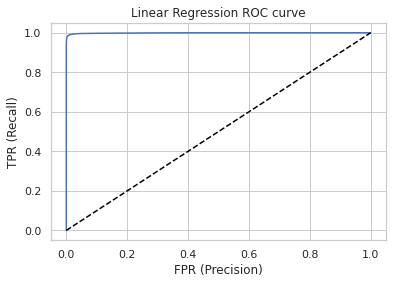

In [33]:
# Analyze Performance 
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, RF_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[ 89556    265]
 [ 10772 100047]]


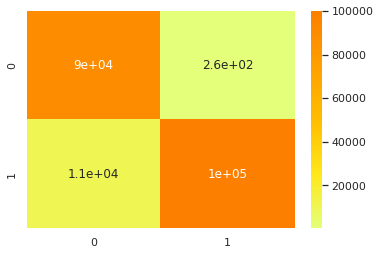

In [34]:
# Confusion matrix
cm=confusion_matrix(y_pred,ytest)
print(cm)
sns.heatmap(cm,annot=True,cmap='Wistia')

## Lets fit the XGBClassifier

In [35]:
# importing of XGBClassifier
from xgboost import XGBClassifier
xgb=XGBClassifier()
XGB_fit=xgb.fit(xtrain, ytrain)
y_predict = XGB_fit.predict(xtest)
XGB_probability = XGB_fit.predict_proba(xtest)[:,1]


# Test metrics
acc_xgb=accuracy_score(ytest,y_predict)
recall_xgb=recall_score(ytest,y_predict)
precision_xgb=precision_score(ytest,y_predict)
f1score_xgb=f1_score(ytest,y_predict)

AUC_xgb=roc_auc_score(y_predict,ytest)

# Performance metrics
print(accuracy_score(y_predict,ytest))
print("ROC_AUC Score:",AUC_xgb)

0.7974681020733653
ROC_AUC Score: 0.8195763966560058


In [36]:
# classification report
print(classification_report(y_predict,ytest))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77     73940
           1       0.93      0.74      0.82    126700

    accuracy                           0.80    200640
   macro avg       0.80      0.82      0.79    200640
weighted avg       0.83      0.80      0.80    200640



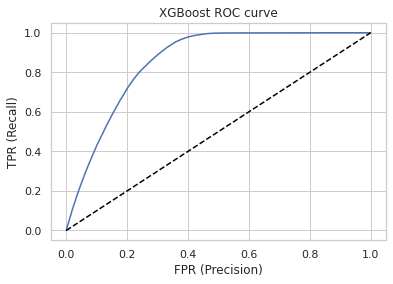

In [37]:
# performance and evaluation
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, XGB_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[66816 33512]
 [ 7124 93188]]


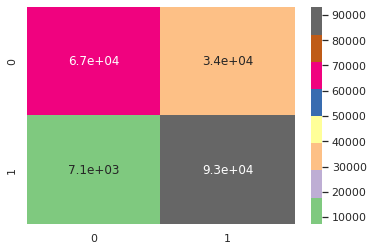

In [38]:
#useful to find how many values are classified correctly
cm=confusion_matrix(ytest,y_predict)
print(cm)
sns.heatmap(cm,annot=True,cmap='Accent')

## Comparison of the different models

In [39]:
## Comparing the performance of the models
ind=['Logistic regression','Randomforest','XGBClassifier']
data={"Accuracy":[accu_logReg,acc_ranFor,acc_xgb],"Recall":[recall_logReg,recall_ranFor,recall_xgb],"Precision":[prec_logReg,prec_ranFor,precision_xgb],
    'f1_score':[f1_logReg,f1_ranFor,f1score_xgb],"ROC_AUC":[Auc_logReg,Auc_Ran_For,AUC_xgb]}
result=pd.DataFrame(data=data,index=ind)
result


,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.783632,0.977291,0.704429,0.818724,0.833686
Randomforest,0.944991,0.997358,0.902796,0.947724,0.949923
XGBClassifier,0.797468,0.928982,0.735501,0.820996,0.819576


The ML model for the problem statement was created using python with the help of the dataset, and the ML model created with Random Forest and XGBClassifier models performed better than Logistics Regression model. Thus, for the given problem, the models created by Random Forest and XGBClassifier.

# Conclusion

* Customers of aged between 30 to 60 are more likely to buy insurance.
* Customers aged between 30 to 60 are more likely to buy insurance.
* Youngsters under 30 are not intrigued by vehicle insurance. Reasons could be  the absence of involvement, less awareness about insurance and they may not have costly vehicles yet.
* Consumers with 1-2-year-old vehicles are more interested as compared to others.
* Consumers with less than 1-year-old Vehicles have very less chance of buying Insurance
* Customers with Driving License have a higher chance of buying Insurance.
* Customers with Vehicle_Damage are likely to buy insurance.
* The male category is somewhat more noteworthy than that of females and chances of purchasing the insurance are likewise minimally high.
* The variable such as Age, Previously_insured, Annual_premium is more affecting the target variable.
* Comparing the ROC curve we can see that the Random Forest model performs better. Because curves closer to the top-left corner indicate better performance.



In [40]:
## Comparing the performance of the models
ind=['Linear regression','Randomforest','XGBClassifier','Decision Tree']
data={"MAE":[1.6316372640248982,1.482502,1.213659,1.4013567],"MSE":[5.726621927695115,1.502308,1.297367,5.060013163801489],"RMSE":[2.3930361317153395,2.256104,2.028301,2.2494473018502767], 
      'R2':[0.8058561756109394,0.827439,0.881776,0.8284555328633679], 'Adjusted R2':[0.8058158870574743,0.827403,0.860498,0.8284199341083851]}
result=pd.DataFrame(data=data,index=ind)
result


,MAE,MSE,RMSE,R2,Adjusted R2
Linear regression,1.631637,5.726622,2.393036,0.805856,0.805816
Randomforest,1.482502,1.502308,2.256104,0.827439,0.827403
XGBClassifier,1.213659,1.297367,2.028301,0.881776,0.860498
Decision Tree,1.401357,5.060013,2.249447,0.828456,0.828420
